<a href="https://colab.research.google.com/github/CurdtMillion/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/DS_132_Intermediate_Linear_Algebra_TheAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [48]:
# Getting mean w/o libraries
Sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
m = sum(Sales)
n = len(Sales)

Sales_mean = m/n
Sales_mean

3052.714285714286

In [0]:
import numpy as np
import pandas as pd
import math
import statistics

In [50]:
# Getting variance
variance = statistics.variance(Sales)
variance

214387.90476190476

In [51]:
# Getting Standard Deviation
print('{:.2f}'.format(np.sqrt(variance)))

463.02


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# which libraries should we import here?
import numpy as np
import pandas as pd
import math

In [53]:
Sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers_last_week = [127, 80, 105, 92, 120, 115, 93]

np.cov(Sales, customers_last_week).round(5)

array([[214387.90476,   7604.35714],
       [  7604.35714,    290.95238]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [54]:
# Standard deviation of customer_last_week
print('{:.2f}'.format(np.std(customers_last_week)))

15.79


In [55]:
np.cov(customers_last_week, Sales)

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

In [56]:
Sales_df = pd.DataFrame({'Sales':Sales})
Sales_df['customers_last_week']=pd.Series(customers_last_week)
Sales_df

,Sales,customers_last_week
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [57]:
Sales_df.cov()

,Sales,customers_last_week
Sales,214387.904762,7604.357143
customers_last_week,7604.357143,290.952381


In [0]:
# Using previous work to get correlation
std_cust = Sales_df['Sales'].std(ddof=1)
std_sale = Sales_df['customers_last_week'].std(ddof=1)

In [59]:
cov_cs = Sales_df['Sales'].cov(Sales_df['customers_last_week'])
cov_cs.round(3)

7604.357

In [0]:
denom = std_cust*std_sale

In [61]:
corr_cs = cov_cs/denom
corr_cs

0.9628339778148909

In [62]:
# Or you can do this:
Sales_df.corr()

,Sales,customers_last_week
Sales,1.000000,0.962834
customers_last_week,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import numpy as np
import pandas as pd

In [64]:
titanic = ('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic_df = pd.read_csv(titanic)
titanic_df.head(5)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [65]:
# Filtering out numberic datatypes
numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = titanic_df.select_dtypes(include=numeric)
new_df.head(5)

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [66]:
# Getting covariance
new_df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [67]:
new_df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


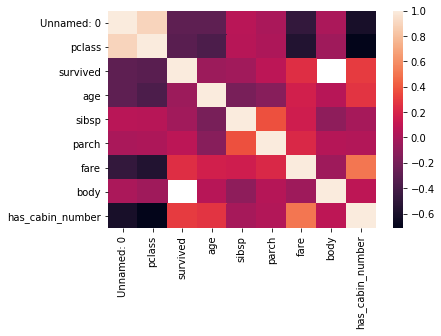

In [68]:
# Make a heat map out of it, why don't ya?
import seaborn as sns
sns.heatmap(new_df.corr());

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

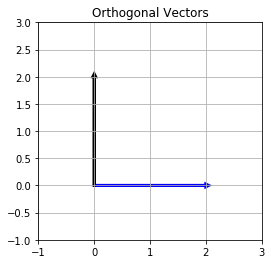

In [69]:
# The synonym for orthogonal is perpendicular
# Two  orthogonal vectors:
import matplotlib.pyplot as plt
vector_1 = np.array([2,0])
vector_2 = np.array([0,2])

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, linewidth=3, color ='blue')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, linewidth=3, color ='black')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.title('Orthogonal Vectors')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

In [71]:
dot_product = np.dot(a,b)
print('The dot product of a and b is', dot_product)

The dot product of a and b is -40


In [0]:
# They are not orthogonal, b/c the dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

In [74]:
# ||c||**2
norm_c = np.linalg.norm(c)
norm_c

25.787593916455254

In [75]:
# Dot prodoct of c
dot_prod_c = np.dot(c,c)
dot_prod_c

665

In [76]:
# c Transpose c
pd.DataFrame(c)

,0
0,2
1,-15
2,6
3,20


In [77]:
c.T

array([  2, -15,   6,  20])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [78]:
# Unit vectors
# Not sure what Latex is, outside of a type of rubber.
d = np.array([7, 12])
e = np.array([2, 11, -8])

norm_d = np.linalg.norm(d)
norm_e = np.linalg.norm(e)
d_hat = d/norm_d
e_hat = e/norm_e

print(d_hat, '\n', e_hat)

[0.50387103 0.8637789 ] 
 [ 0.14547859  0.80013226 -0.58191437]


Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [79]:
# Making it a unit vector
f = ([4, 12, 11, 9, 2])
norm_f = np.linalg.norm(f)
f_hat = f/norm_f
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [80]:
# Determining the length
f_hat_norm = np.linalg.norm(f_hat)
f_hat_norm.round(4)

1.0

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
# Linearly dependent
o = ([-0.8, 1.3])
p = ([-1.6, 2.6])

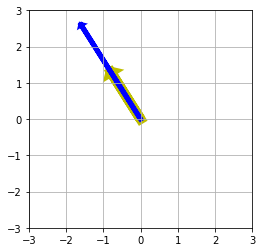

In [82]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.arrow(0, 0, o[0], o[1], head_width=.02, head_length=.01, linewidth=10, color='y')
plt.arrow(0, 0, p[0], p[1], head_width=.02, head_length=.01, linewidth=5, color='b')
plt.show();

In [0]:
# Linearly independent vectors, which are not orthogonal
q = ([-3, 1])
r = ([0, 1])

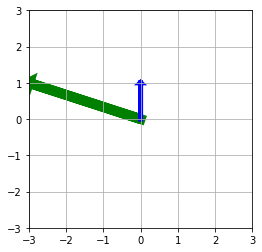

In [84]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.arrow(0, 0, q[0], q[1], head_width=.02, head_length=.01, linewidth=10, color='g')
plt.arrow(0, 0, r[0], r[1], head_width=.02, head_length=.01, linewidth=5, color='b')
plt.show();


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# Span: set of all linear combinations of a set of vectors.
g = np.array([1,2])
h = np.array([4,8])



## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

To form a basis means that there are a set of vectors which are linearly independent, and they also span the vector space of the original vector.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the dimension of the vector space spanned by its columns. Per the lecture, the number of rows/columns does not neccessarily mean that it will span that dimensional space. Figuring out the 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

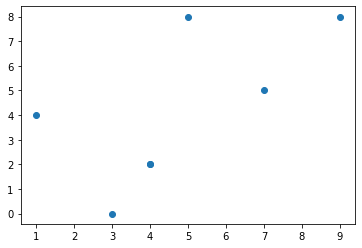

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()